In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

https://www.kaggle.com/discussions/general/74235
follow instructions

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
#kaggle datasets download -d tusharpadhy/deepfake-dataset

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cecilia0999","key":"cc1406dbb42304ade9f37c8885076ba5"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d tusharpadhy/deepfake-dataset


ref                                              title                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------  ----------------------------------  -----  -------------------  -------------  ---------  ---------------  
zain280/car-dataset                              Car Dataset                           1MB  2024-03-02 15:14:49           1659         25  1.0              
syedanwarafridi/vehicle-sales-data               Vehicle Sales Data                   19MB  2024-02-21 20:16:17           7918        138  1.0              
mahad049/job-placement-dataset                   Job placement dataset                 6KB  2024-03-03 08:18:12            984         25  0.9411765        
yaminh/smartphone-sale-dataset                   Smartphones Sales Dataset            65KB  2024-03-03 16:48:27           1069         22  0.88235295       
tarunrm09/climate-change-indicators              Climate c

In [ ]:
! mkdir dataset
! unzip deepfake-dataset.zip -d dataset

In [ ]:
#batch size = 32

In [ ]:
from torchvision import transforms, datasets
import torch
import matplotlib.pyplot as plt
import numpy as np


batch_size = 256
# Directories for your datasets
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'
val_dir = '/content/dataset/valid'

# Transformation for resizing and converting images to Tensor
data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.ToTensor()])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=data_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=data_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=data_transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Mapping from index to class
idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

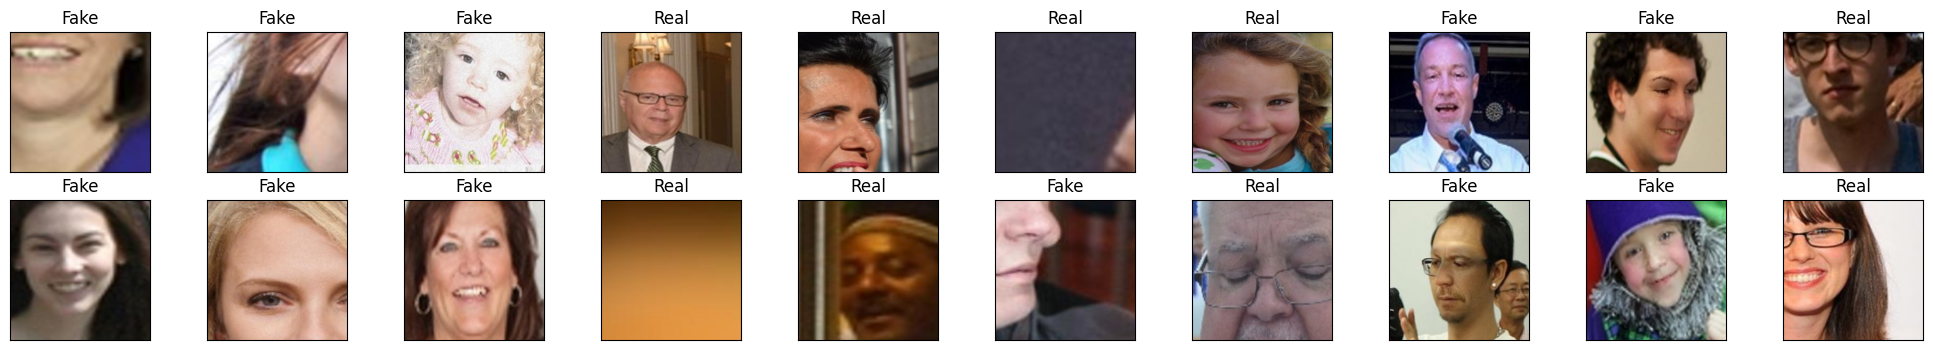

In [ ]:
# Visualize some sample data
# Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()  # Convert images to numpy for display

# Plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    # Use the mapping to display the correct class name
    label = idx_to_class[labels[idx].item()]
    ax.set_title(label)

plt.show()

In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

938
233
121


Refer to tut 3b, keyboard_arrow_down
Applying AlexNet on a Dataset
In order to use transfer learning with AlexNet on a new dataset we will have to keep in mind how AlexNet was trained. AlexNet was trained on images of 3 x 224 x 224 images from the ImageNet dataset. These images are of higher resolution than what we have seen until now and are in colour. Hence, it would take significant effort to apply AlexNet to MNIST data, instead we will use another dataset.

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent

# alexnet
import torchvision.models

torch.manual_seed(1) # set the random seed

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# confirm output from AlexNet feature extraction
alexNet = torchvision.models.alexnet(pretrained=True)
features = alexNet.features(images)
features.shape

torch.Size([256, 256, 6, 6])

In [ ]:
import time
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [ ]:
class BinaryANNClassifier(nn.Module):
    def __init__(self):
        super(BinaryANNClassifier, self).__init__()
        self.fc1 = nn.Linear(256 * 6 * 6, 10)
        self.fc2 = nn.Linear(10, 1)  # Changed output features to 1 for binary classification

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)  # Flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.sigmoid(x)  # Applying sigmoid activation for binary classification
        return x


In [ ]:
def get_accuracy(model, train=False):
    if train:
        data_loader = train_loader
    else:
        data_loader = val_loader

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        #############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #############################################

        output = model(ALNC(imgs))

        # Apply threshold to convert probabilities to binary predictions
        pred = (output > 0.5).float()  # Assuming threshold of 0.5
        correct += (pred == labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, data, batch_size=20, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # Training
    n = 0  # The number of iterations
    start_time = time.time()
    for epoch in range(num_epochs):
        mini_b = 0
        for batch in train_loader:
            imgs, labels = batch[0], batch[1]  # Unpack the batch tuple correctly
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            optimizer.zero_grad()

            out = model(ALNC(imgs))  # Forward pass
            loss = criterion(torch.sigmoid(out), labels.float().view(-1, 1))  # Compute the total loss
            loss.backward()  # Backward pass (compute parameter updates)
            optimizer.step()  # Make the updates for each parameter

            # Mini-batch Accuracy
            pred = (out > 0.5).float()  # Apply threshold for binary prediction
            mini_batch_correct = (pred == labels.float().view(-1, 1)).sum().item()
            Mini_batch_total = imgs.shape[0]
            train_acc.append((mini_batch_correct / Mini_batch_total))

            # Save the current training information
            iters.append(n)
            losses.append(float(loss))
            val_acc.append(get_accuracy(model, train=False))  # Compute validation accuracy
            n += 1
            mini_b += 1
            print("Iteration: ", n, 'Progress: %6.2f ' % ((epoch * len(train_loader) + mini_b) / (num_epochs * len(train_loader)) * 100), '%', "Time Elapsed: %6.2f s " % (time.time() - start_time))

        print("Epoch %d Finished. " % epoch, "Time per Epoch: %6.2f s " % ((time.time() - start_time) / (epoch + 1)))

    end_time = time.time()

    # Plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()

    train_acc.append(get_accuracy(model, train=True))
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Total time: %6.2f s  Time per Epoch: %6.2f s " % ((end_time - start_time), ((end_time - start_time) / num_epochs)))

In [ ]:
import torchvision.models
import matplotlib.pyplot as plt
import numpy as np
import PIL
import urllib
import torch
import time
import os
import torchvision
from torchvision import datasets, models, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is enabled")
else:
    print("GPU is not enabled")

GPU is not enabled


In [ ]:
use_cuda = True

model = BinaryANNClassifier()
ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  ALNC.cuda()
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model,train_dataset, batch_size=256, num_epochs=1)

CUDA is not available.  Training on CPU ...


ValueError: too many values to unpack (expected 2)

暂时忽略